In [1]:
import numpy as np
import pandas as pd
import os
import cv2 as cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16

In [2]:
data_dir=r"C:\Users\RJ\Desktop\anaemia rizzzz"

In [3]:
Categories=['anemia','Non-anemia']

In [4]:
data=[]
# iterating through the images path and appending the image and labels in data list

for category in Categories:
    path = os.path.join(data_dir,category)
    class_num=Categories.index(category)  #prints out the index
    for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path,img))
            re=cv2.resize(img_arr,(64,64))
            data.append([re,class_num])

In [5]:
np.random.shuffle(data) #done to ignore overfitting

In [6]:
x_data=[]
y_data=[]

for features,labels in data:
    x_data.append(features)
    y_data.append(labels)

In [7]:
#Arrays allow you to access data elements by their index, which is particularly useful when you need to retrieve specific pieces of data from a larger dataset.
x_data=np.array(x_data)
y_data=np.array(y_data)

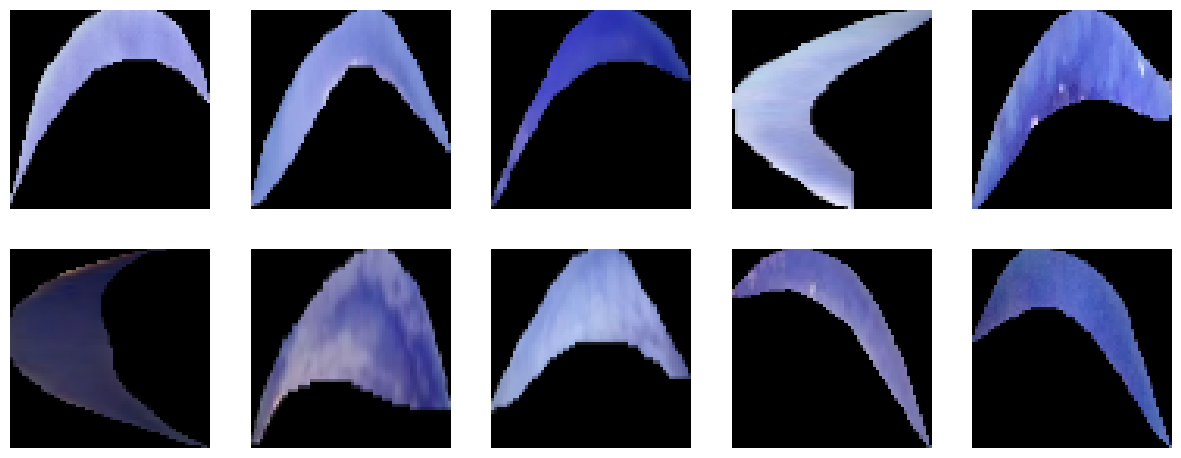

In [8]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_data[i])
    plt.axis('off')

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.33,random_state=42)

In [9]:
x_data=x_data/255  #normalizing the data  to give it a consistent scale

First up: CNN(Convolutional neural network) model:-

In [11]:
model=tf.keras.Sequential() #"defines the sequential flow by allowing you to stack layers on top of each other.
model.add(layers.Conv2D(100,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(150,(3,3),activation="relu") )     
model.add(layers.MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="sigmoid"))                

In [12]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])
#"sparse_categorical_crossentropy" is used for classification with inter-encoded classes.

In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=20)

Epoch 1/20
143/143 [==============================] - 76s 510ms/step - loss: 3.4351 - accuracy: 0.5860 - val_loss: 0.6368 - val_accuracy: 0.6461
Epoch 2/20
143/143 [==============================] - 66s 464ms/step - loss: 0.5610 - accuracy: 0.7243 - val_loss: 0.5590 - val_accuracy: 0.7292
Epoch 3/20
143/143 [==============================] - 75s 521ms/step - loss: 0.3550 - accuracy: 0.8508 - val_loss: 0.4815 - val_accuracy: 0.7982
Epoch 4/20
143/143 [==============================] - 71s 498ms/step - loss: 0.1699 - accuracy: 0.9384 - val_loss: 0.5346 - val_accuracy: 0.8394
Epoch 5/20
143/143 [==============================] - 69s 486ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.7506 - val_accuracy: 0.8415
Epoch 6/20
143/143 [==============================] - 70s 488ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.7921 - val_accuracy: 0.8571
Epoch 7/20
143/143 [==============================] - 70s 493ms/step - loss: 0.0386 - accuracy: 0.9898 - val_loss: 0.6734 - val_ac

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 100)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 150)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29400)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [15]:
y_pred=model.predict(x_test)

44/44 [==============================] - 8s 170ms/step


In [16]:
print("the accuracy score of this CNN model is:",accuracy_score(y_test,y_pred.argmax(axis=1)))

the accuracy score of this CNN model is: 0.8528784648187633


In [17]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       856
           1       0.86      0.75      0.80       551

    accuracy                           0.85      1407
   macro avg       0.85      0.83      0.84      1407
weighted avg       0.85      0.85      0.85      1407



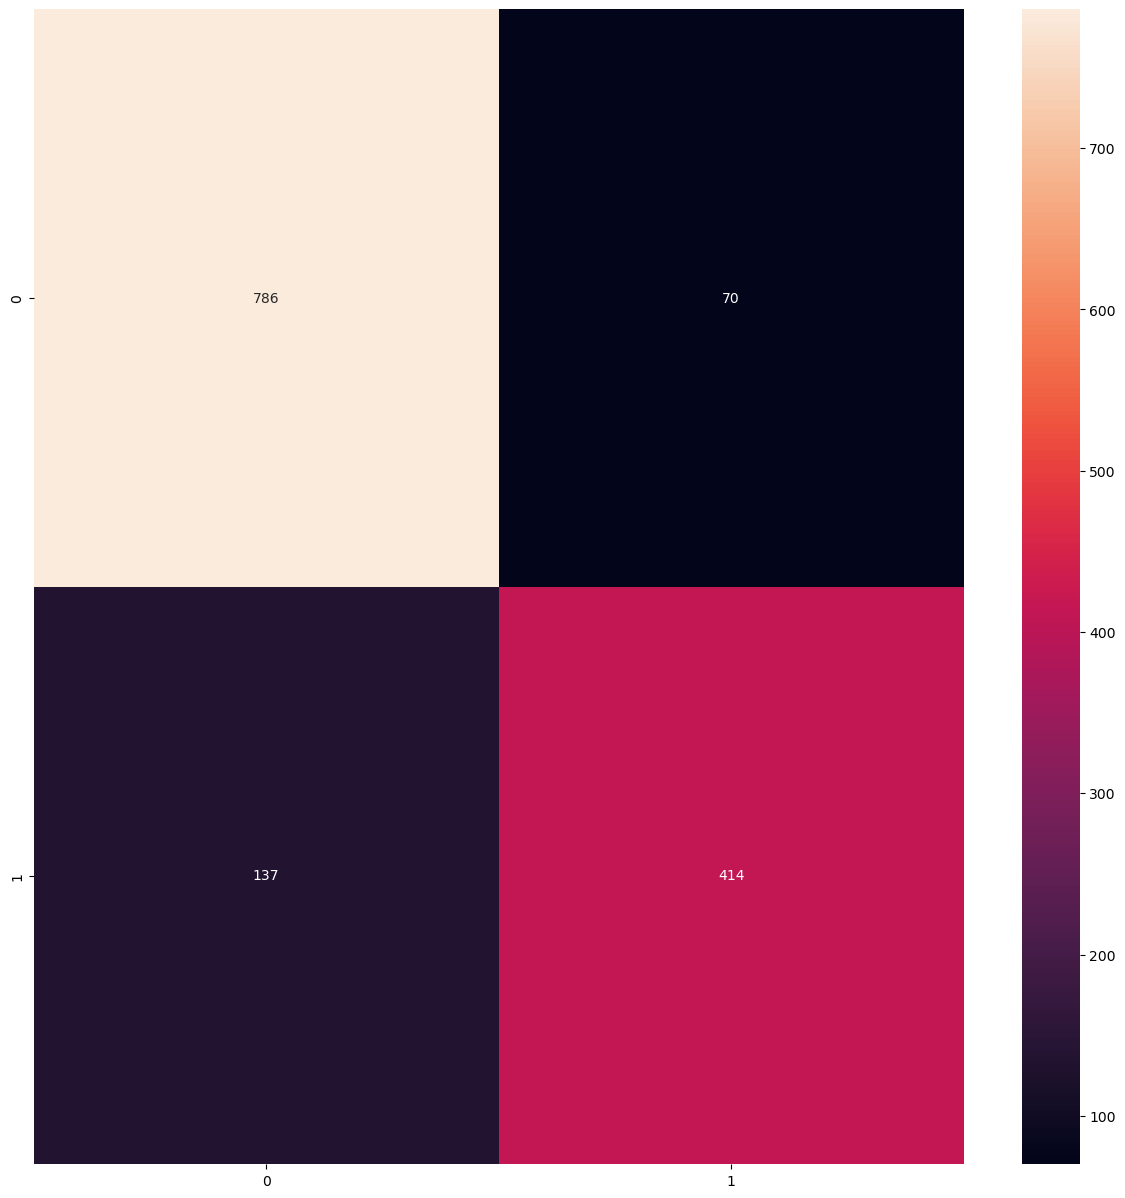

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.show()

In [19]:
#testing the model with the predictions:-
predicts=model.predict(x_test[0].reshape(1,64,64,3))

1/1 [==============================] - 0s 64ms/step


Next, The VGG16 Architecture( A transfer learning model) :-

In [23]:
vgg=VGG16(include_top=False,input_shape=(64,64,3),classes=2,classifier_activation="sigmoid")

In [24]:
vgg_model=Sequential()

In [25]:
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(2,activation="sigmoid"))

In [26]:
vgg_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [27]:
history_vgg=vgg_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
143/143 [==============================] - 552s 4s/step - loss: 2.2442 - accuracy: 0.5709 - val_loss: 0.6759 - val_accuracy: 0.5928
Epoch 2/20
143/143 [==============================] - 523s 4s/step - loss: 0.6830 - accuracy: 0.5839 - val_loss: 0.6691 - val_accuracy: 0.5956
Epoch 3/20
143/143 [==============================] - 574s 4s/step - loss: 0.6621 - accuracy: 0.5993 - val_loss: 0.6652 - val_accuracy: 0.5977
Epoch 4/20
143/143 [==============================] - 560s 4s/step - loss: 0.6592 - accuracy: 0.6140 - val_loss: 0.6699 - val_accuracy: 0.6091
Epoch 5/20
143/143 [==============================] - 606s 4s/step - loss: 0.6491 - accuracy: 0.6175 - val_loss: 0.6532 - val_accuracy: 0.6034
Epoch 6/20
143/143 [==============================] - 591s 4s/step - loss: 0.6601 - accuracy: 0.6126 - val_loss: 0.7157 - val_accuracy: 0.5928
Epoch 7/20
143/143 [==============================] - 528s 4s/step - loss: 0.6485 - accuracy: 0.6315 - val_loss: 0.6407 - val_accuracy: 0.6297

In [32]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 14718786 (56.15 MB)
Trainable params: 14718786 (56.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
vgg_y_pred=vgg_model.predict(x_test)

44/44 [==============================] - 48s 1s/step


In [34]:
print("the accuracy for this vgg16 model is",accuracy_score(y_test,vgg_y_pred.argmax(axis=1)))

the accuracy for this vgg16 model is 0.6979388770433547


In [35]:
print(classification_report(y_test,vgg_y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       834
           1       0.74      0.40      0.52       573

    accuracy                           0.70      1407
   macro avg       0.71      0.65      0.65      1407
weighted avg       0.71      0.70      0.67      1407



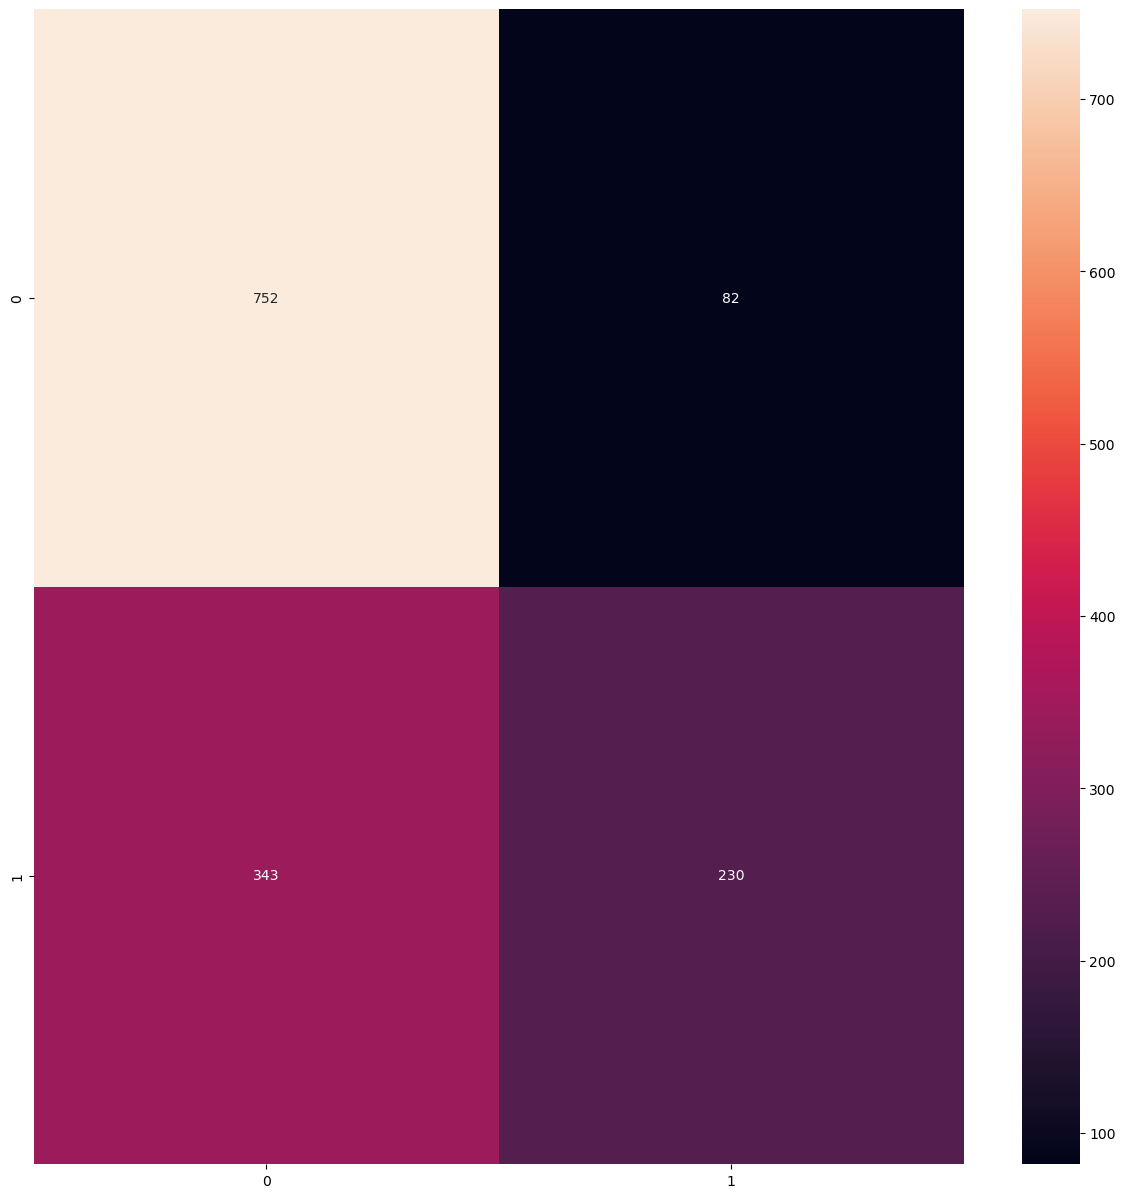

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,vgg_y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.show()

Third one now, the ResNet50 model(another transfer learning model) :-

In [13]:
resnet=ResNet50(include_top=False,input_shape=(64,64,3),classes=2)

94765736/94765736 [==============================] - 28s 0us/step


In [14]:
resnet_model=Sequential()
resnet_model.add(resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(2,activation="sigmoid"))

In [15]:
resnet_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
history_resnet=resnet_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
143/143 [==============================] - 1216s 7s/step - loss: 1.8631 - accuracy: 0.5790 - val_loss: 1.8050 - val_accuracy: 0.5913
Epoch 2/20
143/143 [==============================] - 1266s 9s/step - loss: 1.0118 - accuracy: 0.5944 - val_loss: 37.9497 - val_accuracy: 0.5885
Epoch 3/20
143/143 [==============================] - 1448s 10s/step - loss: 0.9090 - accuracy: 0.5933 - val_loss: 79.5215 - val_accuracy: 0.4435
Epoch 4/20
143/143 [==============================] - 781s 5s/step - loss: 0.7613 - accuracy: 0.5993 - val_loss: 1.1085 - val_accuracy: 0.5231
Epoch 5/20
143/143 [==============================] - 774s 5s/step - loss: 0.7461 - accuracy: 0.6018 - val_loss: 0.6723 - val_accuracy: 0.6027
Epoch 6/20
143/143 [==============================] - 782s 5s/step - loss: 0.7285 - accuracy: 0.6035 - val_loss: 0.6907 - val_accuracy: 0.5522
Epoch 7/20
143/143 [==============================] - 807s 6s/step - loss: 0.7360 - accuracy: 0.6084 - val_loss: 0.8075 - val_accuracy: 

In [17]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 23604098 (90.04 MB)
Trainable params: 23550978 (89.84 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [18]:
resnet_y_pred=resnet_model.predict(x_test)

44/44 [==============================] - 26s 500ms/step


In [19]:
print("the accuracy score of this model is:",accuracy_score(y_test,resnet_y_pred.argmax(axis=1)))

the accuracy score of this model is: 0.7221037668798863


In [21]:
print(classification_report(y_test,resnet_y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       834
           1       0.70      0.56      0.62       573

    accuracy                           0.72      1407
   macro avg       0.72      0.70      0.70      1407
weighted avg       0.72      0.72      0.72      1407



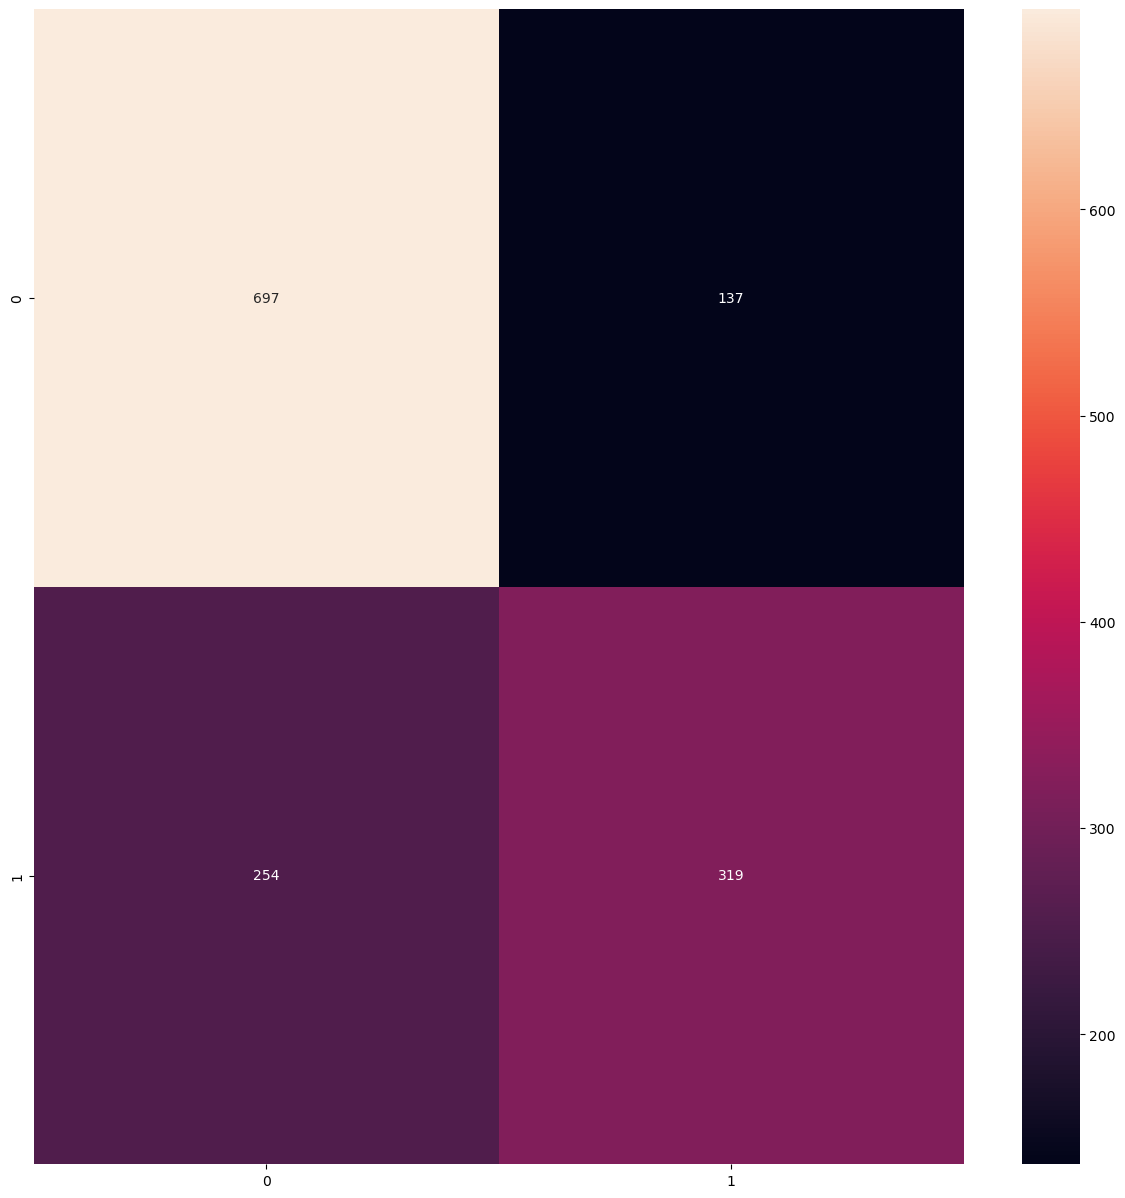

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,resnet_y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.show()

Forth model will be a XGboost classifier model:-

In [10]:
x_train_reshaped=x_train.reshape(x_train.shape[0],-1)

In [11]:
xgb_model=xgb.XGBClassifier()

In [12]:
xgb_model.fit(x_train_reshaped,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
x_test_reshaped=x_test.reshape(x_test.shape[0],-1)

In [15]:
y_pred=xgb_model.predict(x_test_reshaped)

In [17]:
print(f"the accuracy of the xgb classifier is {accuracy_score(y_pred,y_test)}")

the accuracy of the xgb classifier is 0.9047619047619048


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       850
           1       0.91      0.84      0.87       557

    accuracy                           0.90      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.91      0.90      0.90      1407



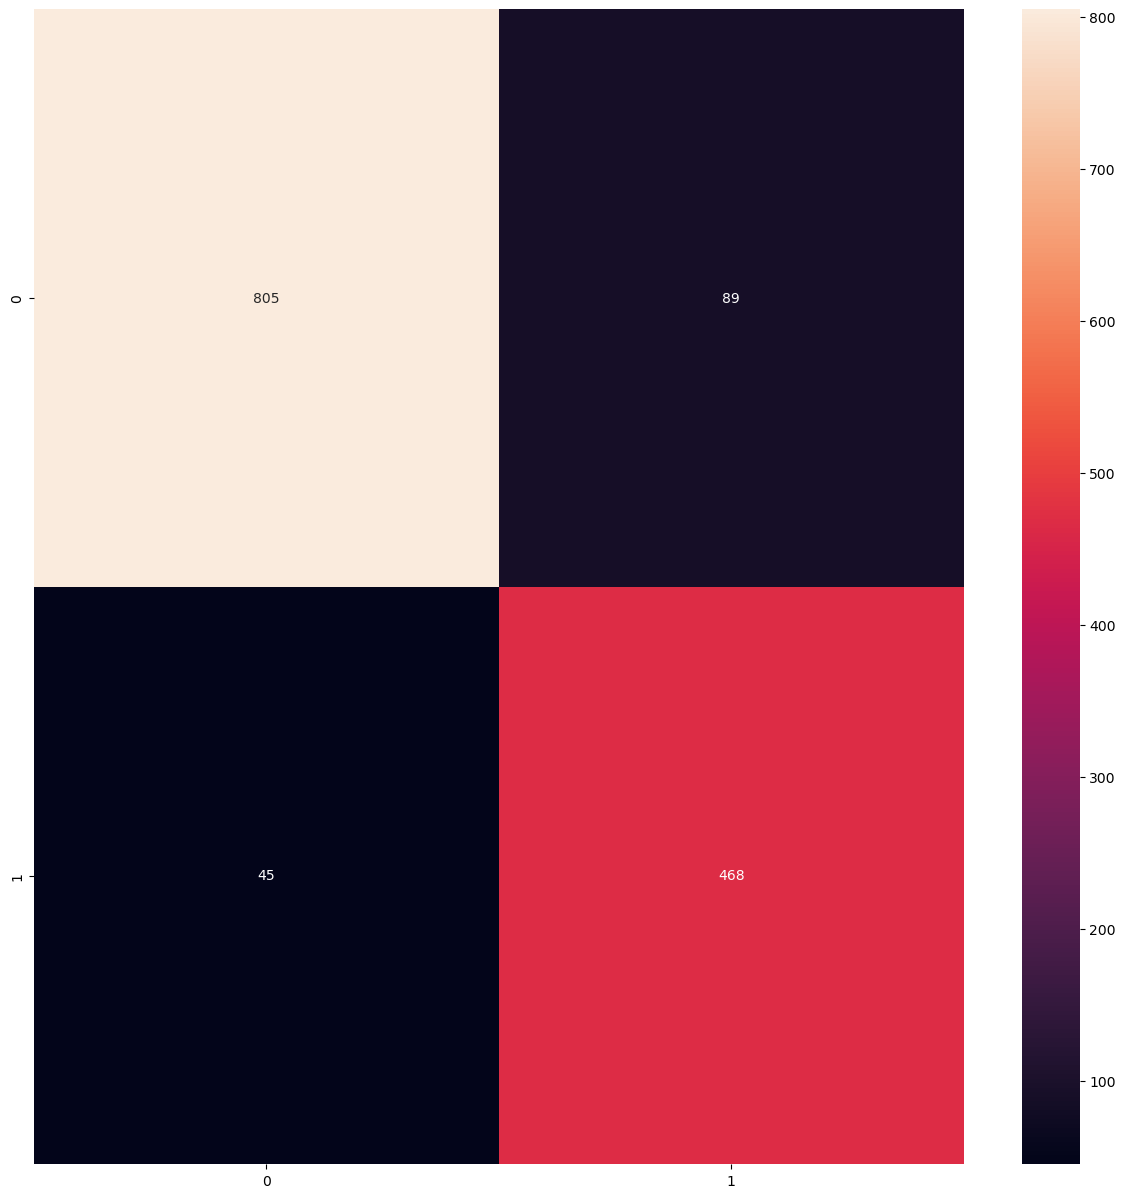

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='g')
plt.show()

The last one, Logistic regression model:-

In [21]:
lr=LogisticRegression()

In [22]:
lr.fit(x_train_reshaped,y_train)

C:\Users\RJ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred=lr.predict(x_test_reshaped)

In [25]:
print("The accuracy score of logistic regression model:",accuracy_score(y_pred,y_test))

The accuracy score of logistic regression model: 0.8663823738450604


In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       878
           1       0.81      0.85      0.83       529

    accuracy                           0.87      1407
   macro avg       0.86      0.86      0.86      1407
weighted avg       0.87      0.87      0.87      1407



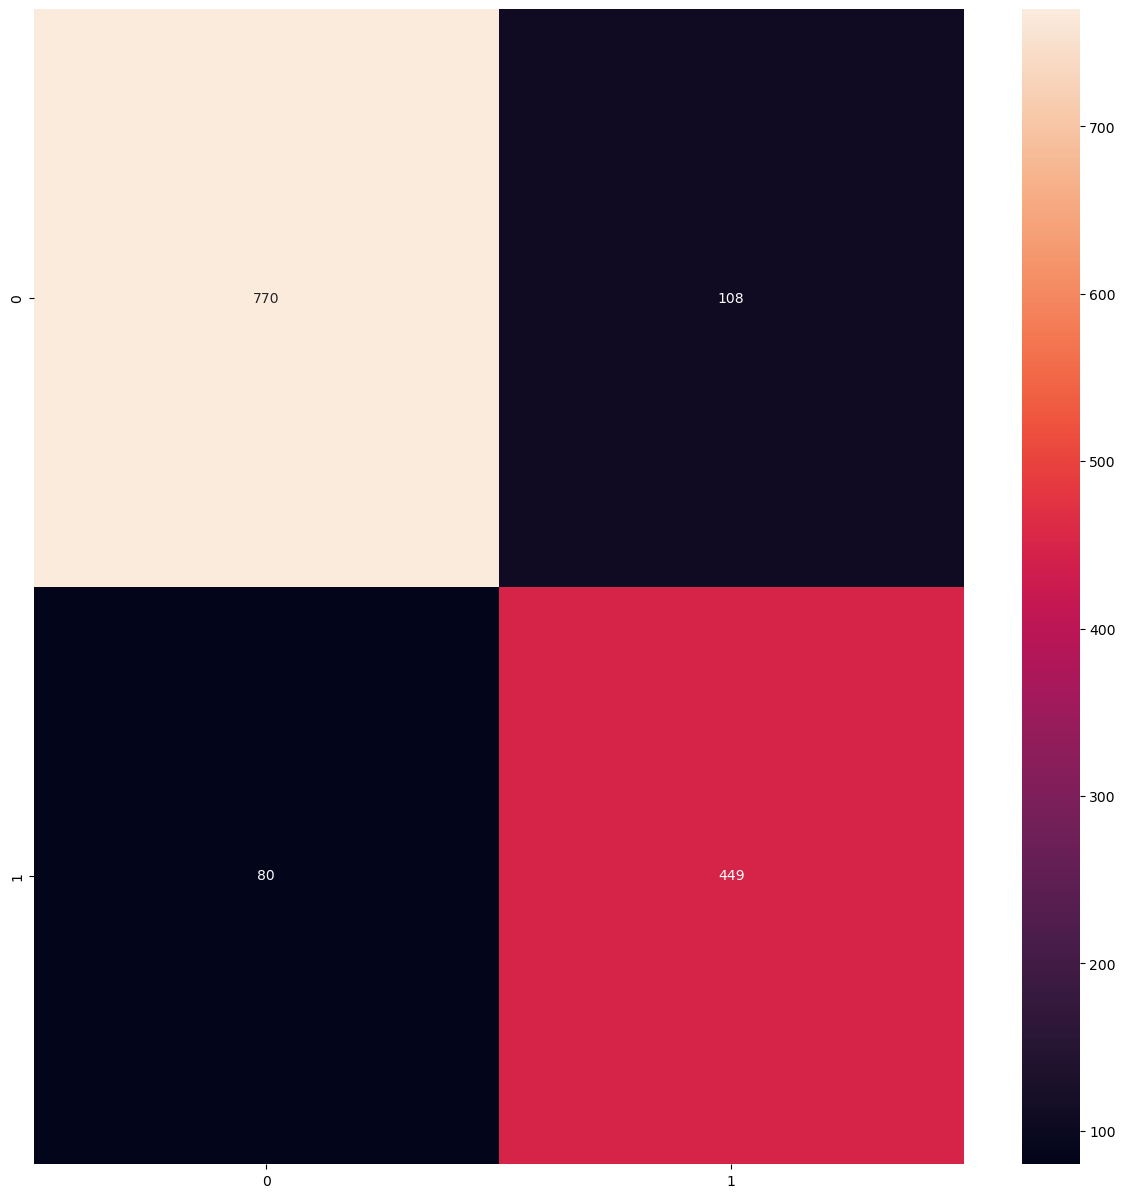

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='g')
plt.show()

---------------------------------------------THE END---------------------------------------------------